In [ ]:
# Selalu awali dengan import-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from catboost import CatBoostClassifier
import joblib
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('combined_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16993 entries, 0 to 16992
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           16993 non-null  int64  
 1   Protocol           16993 non-null  int64  
 2   Timestamp          16993 non-null  object 
 3   Flow Duration      16993 non-null  int64  
 4   Tot Fwd Pkts       16993 non-null  int64  
 5   Tot Bwd Pkts       16993 non-null  int64  
 6   TotLen Fwd Pkts    16993 non-null  int64  
 7   TotLen Bwd Pkts    16993 non-null  float64
 8   Fwd Pkt Len Max    16993 non-null  int64  
 9   Fwd Pkt Len Min    16993 non-null  int64  
 10  Fwd Pkt Len Mean   16993 non-null  float64
 11  Fwd Pkt Len Std    16993 non-null  float64
 12  Bwd Pkt Len Max    16993 non-null  int64  
 13  Bwd Pkt Len Min    16993 non-null  int64  
 14  Bwd Pkt Len Mean   16993 non-null  float64
 15  Bwd Pkt Len Std    16993 non-null  float64
 16  Flow Byts/s        169

In [ ]:
# Cek nilai unik pada kolom 'Label'
unique_labels = df['Label'].unique()
print("Jenis label yang ditemukan:", unique_labels)
print("Jumlah jenis label:", len(unique_labels))


Jenis label yang ditemukan: ['Bot' 'Benign' 'SSH-Bruteforce' 'FTP-BruteForce' 'DDOS attack-HOIC'
 'DDOS attack-LOIC-UDP' 'DoS attacks-Hulk' 'DoS attacks-SlowHTTPTest'
 'Infilteration' 'Brute Force -XSS' 'SQL Injection' 'Brute Force -Web'
 'DDoS attacks-LOIC-HTTP' 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris']
Jumlah jenis label: 15


In [ ]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,16993.000000,16993.000000,1.699300e+04,16993.000000,16993.000000,1.699300e+04,1.699300e+04,16993.000000,16993.000000,16993.000000,...,16993.000000,16993.000000,1.699300e+04,1.699300e+04,1.699300e+04,1.699300e+04,1.699300e+04,1.699300e+04,1.699300e+04,1.699300e+04
mean,2459.366798,8.091685,-1.108627e+08,16351.058436,5.798093,5.242387e+05,2.764762e+03,228.643618,12.424469,69.384479,...,16347.237863,22.559171,3.982179e+05,1.511369e+05,5.155450e+05,2.910450e+05,6.396670e+07,4.067069e+07,1.669092e+08,8.259940e+06
std,8801.950621,4.425939,9.897550e+09,42878.280630,29.977731,1.371737e+06,4.156499e+04,246.720507,55.500860,77.935996,...,42879.351936,9.600797,2.326689e+06,1.475838e+06,3.191936e+06,1.779778e+06,4.252501e+09,3.000563e+09,1.195572e+10,1.215955e+08
min,0.000000,0.000000,-9.190110e+11,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,6.000000,1.190600e+04,3.000000,0.000000,1.600000e+01,0.000000e+00,8.000000,0.000000,6.666667,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.000000,3.880760e+05,3.000000,3.000000,3.260000e+02,1.290000e+02,161.000000,0.000000,49.200000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,6.000000,8.947956e+07,18.000000,4.000000,1.928000e+03,9.350000e+02,352.000000,0.000000,108.666667,...,12.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65509.000000,17.000000,1.200000e+08,309629.000000,3487.000000,9.908128e+06,4.977974e+06,1454.000000,816.000000,816.000000,...,309628.000000,40.000000,7.870000e+07,5.090000e+07,7.870000e+07,7.870000e+07,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [ ]:
cols = ['Flow Byts/s', 'Flow Pkts/s', 'Fwd Pkts/s', 'Bwd Pkts/s']

for col in cols:
    series = df[col]

    count_nan = series.isna().sum()
    count_missing_str = series.astype(str).str.lower().eq('missing value').sum()
    count_blank_str = series.astype(str).str.strip().eq('').sum()
    count_inf = np.isinf(series).sum()

    total = count_nan + count_missing_str + count_blank_str + count_inf

    print(f"\nKolom: {col}")
    print(f"  - NaN:             {count_nan}")
    print(f"  - 'missing value': {count_missing_str}")
    print(f"  - Kosong (' '):    {count_blank_str}")
    print(f"  - Inf:             {count_inf}")
    print(f"  Total:          {total}")



Kolom: Flow Byts/s
  - NaN:             20
  - 'missing value': 0
  - Kosong (' '):    0
  - Inf:             9
  Total:          29

Kolom: Flow Pkts/s
  - NaN:             0
  - 'missing value': 0
  - Kosong (' '):    0
  - Inf:             29
  Total:          29

Kolom: Fwd Pkts/s
  - NaN:             0
  - 'missing value': 0
  - Kosong (' '):    0
  - Inf:             0
  Total:          0

Kolom: Bwd Pkts/s
  - NaN:             0
  - 'missing value': 0
  - Kosong (' '):    0
  - Inf:             0
  Total:          0


In [ ]:

subset_cols = ['Flow Byts/s', 'Flow Pkts/s', 'Fwd Pkts/s', 'Bwd Pkts/s']
df_subset = df[subset_cols]
df_subset



,Flow Byts/s,Flow Pkts/s,Fwd Pkts/s,Bwd Pkts/s
0,38021.225040,584.941924,250.689396,334.252528
1,37525.773200,577.319588,247.422680,329.896907
2,1888.155495,10.439489,5.567727,4.871761
3,45714.859840,703.305536,301.416658,401.888878
4,38296.439690,589.175995,252.503998,336.671997
...,...,...,...,...
16988,0.000000,0.993454,0.993454,0.000000
16989,23.657628,0.158964,0.130912,0.028053
16990,23.657745,0.168316,0.140263,0.028053
16991,0.000000,0.986882,0.986882,0.000000




> Berdasarkan tabel diatas, untuk menggantikan nilai INF pada `Flow Pkts/s` dapat menggunakan penjumlahan dari nilai pada kolom `Fwd Pkts/s` dan `Bwd Pkts/s`



# Handling *missing value* dan INF

In [ ]:
# 1. Ganti inf jadi NaN
df['Flow Byts/s'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Flow Pkts/s'].replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Ganti NaN di Flow Byts/s dengan median
median_value = df['Flow Byts/s'].median()
df['Flow Byts/s'].fillna(median_value, inplace=True)

# 3. Ganti NaN di Flow Pkts/s dengan penjumlahan Fwd + Bwd
df['Flow Pkts/s'].fillna(
    df['Fwd Pkts/s'] + df['Bwd Pkts/s'],
    inplace=True
)


# Verifikasi Data

In [ ]:
# CHECK FOR DUPLICATE ROWS
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

Total Duplicate Rows: 0


In [ ]:
# Drop duplicates rows
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

Total Duplicate Rows: 0


In [ ]:
# CHECK FOR INFINITE VALUES (INF, -INF)
inf_values = (df == np.inf).sum() + (df == -np.inf).sum()
inf_values = inf_values[inf_values > 0]
if not inf_values.empty:
    print(inf_values)
else:
    print("No Infinite Values Found!")

No Infinite Values Found!


In [ ]:
# CHECK FOR EMPTY ROWS
empty_rows = (df.isnull().all(axis=1)).sum()
print(f"Total Empty Rows: {empty_rows}")

Total Empty Rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16993 entries, 0 to 16992
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           16993 non-null  int64  
 1   Protocol           16993 non-null  int64  
 2   Timestamp          16993 non-null  object 
 3   Flow Duration      16993 non-null  int64  
 4   Tot Fwd Pkts       16993 non-null  int64  
 5   Tot Bwd Pkts       16993 non-null  int64  
 6   TotLen Fwd Pkts    16993 non-null  int64  
 7   TotLen Bwd Pkts    16993 non-null  float64
 8   Fwd Pkt Len Max    16993 non-null  int64  
 9   Fwd Pkt Len Min    16993 non-null  int64  
 10  Fwd Pkt Len Mean   16993 non-null  float64
 11  Fwd Pkt Len Std    16993 non-null  float64
 12  Bwd Pkt Len Max    16993 non-null  int64  
 13  Bwd Pkt Len Min    16993 non-null  int64  
 14  Bwd Pkt Len Mean   16993 non-null  float64
 15  Bwd Pkt Len Std    16993 non-null  float64
 16  Flow Byts/s        169

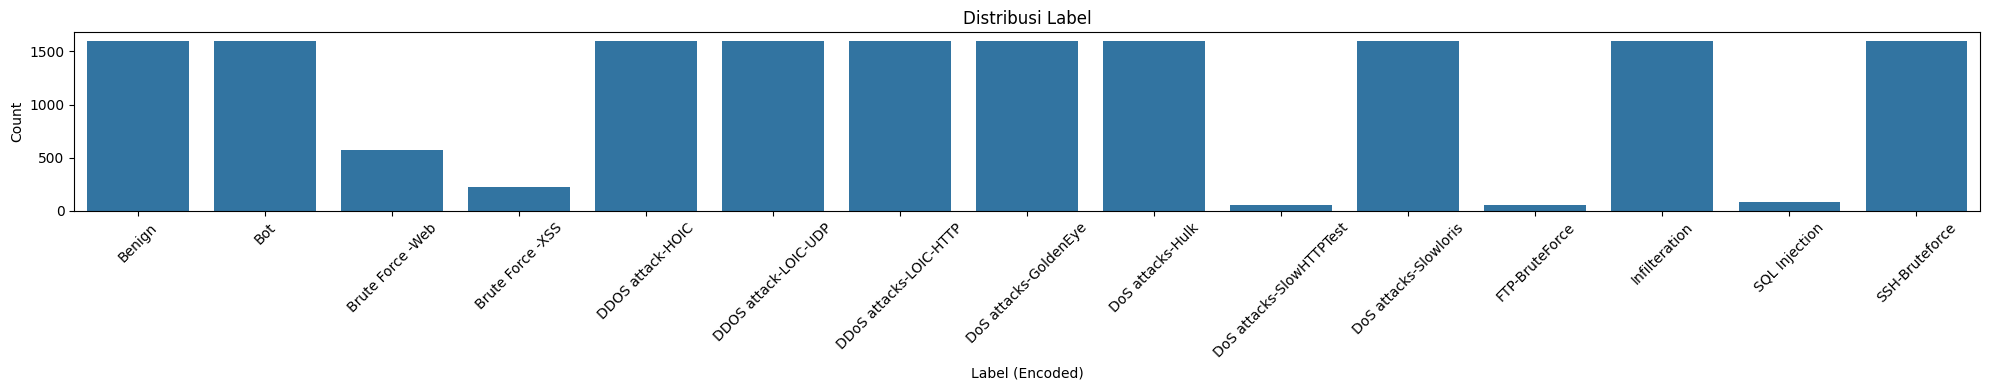

In [ ]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x='Label', order=sorted(df['Label'].unique()))
plt.title('Distribusi Label')
plt.xlabel('Label (Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['Label'].value_counts(normalize=True)

,proportion
Label,
Bot,0.094156
Benign,0.094156
SSH-Bruteforce,0.094156
DDOS attack-HOIC,0.094156
DDOS attack-LOIC-UDP,0.094156
DoS attacks-Hulk,0.094156
Infilteration,0.094156
DoS attacks-GoldenEye,0.094156
DoS attacks-Slowloris,0.094156


## **MAPPING**

In [ ]:
label_mapping = {
    "Bot": 0,
    "Benign": 1,
    "SSH-Bruteforce": 2,
    "DDOS attack-HOIC": 3,
    "DDOS attack-LOIC-UDP": 4,
    "DoS attacks-Hulk": 5,
    "Infilteration": 6,
    "DoS attacks-GoldenEye": 7,
    "DoS attacks-Slowloris": 8,
    "DDoS attacks-LOIC-HTTP": 9,
    "Brute Force -Web": 10,
    "Brute Force -XSS": 11,
    "SQL Injection": 12,
    "DoS attacks-SlowHTTPTest": 13,
    "FTP-BruteForce": 14
}

# Terapkan ke DataFrame
df["Label"] = df["Label"].map(label_mapping)


In [ ]:
df['Label'].value_counts(normalize=True)

,proportion
Label,
0,0.094156
1,0.094156
2,0.094156
3,0.094156
4,0.094156
5,0.094156
6,0.094156
7,0.094156
8,0.094156


## **TRAIN MODEL**

In [ ]:
X = df.drop(columns=['Label','Timestamp'])
y = df['Label']

print(f"Fitur yang digunakan: {X.columns.tolist()}")
print(f"Jumlah fitur terpilih: {len(X.columns.tolist())}")

Fitur yang digunakan: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Balance vs Imbalance

# *Imbalance*

In [ ]:
# Random Forest Classifier (Liza)
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall    = recall_score(y_test, y_pred_rf, average='weighted')
f1        = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_rf, digits=4))



Random Forest Performance:
Accuracy : 0.9470
Precision: 0.9470
Recall   : 0.9470
F1-score : 0.9470

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8807    0.8596    0.8700       292
           2     0.9968    0.9968    0.9968       316
           3     1.0000    1.0000    1.0000       325
           4     0.8911    0.9174    0.9041       339
           5     1.0000    1.0000    1.0000       330
           6     0.8683    0.8850    0.8766       313
           7     1.0000    1.0000    1.0000       320
           8     1.0000    1.0000    1.0000       325
           9     0.9085    0.8797    0.8939       316
          10     0.9504    0.9583    0.9544       120
          11     0.9545    0.9545    0.9545        44
          12     0.8125    0.8125    0.8125        16
          13     0.1765    0.2000    0.1875        15
          14     0.0769    0.0667    0.0714        15

    accuracy    

# ***Confusion Matrix For Best Random Forest***

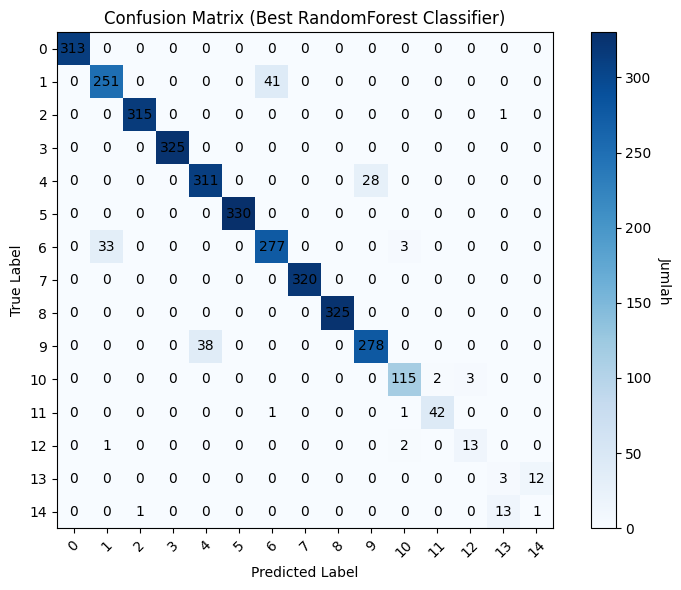

In [ ]:
## Confusion Matrix for Best Random Forest (liza)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
classes = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Jumlah', rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45)
ax.set_yticks(np.arange(len(classes)))
ax.set_yticklabels(classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix (Best RandomForest Classifier)')

fig.tight_layout()
plt.show()

In [ ]:
# Logistic Regression (Fina)
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

y_pred_binary = [round(y) for y in y_pred_lr]

accuracy  = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall    = recall_score(y_test, y_pred_lr, average='weighted')
f1        = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistik Regression Performance")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_lr, digits=4))



Logistik Regression Performance
Accuracy : 0.3048
Precision: 0.2573
Recall   : 0.3048
F1-score : 0.2574

Detail per kelas:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       313
           1     0.6526    0.2123    0.3204       292
           2     0.0000    0.0000    0.0000       316
           3     0.0000    0.0000    0.0000       325
           4     0.7063    1.0000    0.8278       339
           5     0.0000    0.0000    0.0000       330
           6     0.3765    0.5016    0.4301       313
           7     0.1063    0.4344    0.1708       320
           8     0.6598    0.6923    0.6757       325
           9     0.1440    0.2342    0.1783       316
          10     0.0816    0.1333    0.1013       120
          11     0.5217    0.5455    0.5333        44
          12     0.0000    0.0000    0.0000        16
          13     0.0000    0.0000    0.0000        15
          14     0.0000    0.0000    0.0000        15

    accurac

In [ ]:
# CatBoost Classifier IMBALANCE (Rafael)
!pip install catboost
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(verbose=0, random_state=50)
model_cb.fit(X_train, y_train)

y_pred_cb = model_cb.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_cb)
precision = precision_score(y_test, y_pred_cb, average='weighted')
recall    = recall_score(y_test, y_pred_cb, average='weighted')
f1        = f1_score(y_test, y_pred_cb, average='weighted')

print("CatBoost Performance:" )
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")
print("Detail per kelas:")
print(classification_report(y_test, y_pred_cb, digits=4))

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm_no_smote.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (SVM)")
plt.show()



CatBoost Performance:
Accuracy : 0.9482
Precision: 0.9482
Recall   : 0.9482
F1-score : 0.9481

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8794    0.8493    0.8641       292
           2     1.0000    0.9968    0.9984       316
           3     1.0000    1.0000    1.0000       325
           4     0.8928    0.9086    0.9006       339
           5     1.0000    1.0000    1.0000       330
           6     0.8642    0.8946    0.8791       313
           7     1.0000    1.0000    1.0000       320
           8     1.0000    1.0000    1.0000       325
           9     0.9000    0.8829    0.8914       316
          10     0.9752    0.9833    0.9793       120
          11     1.0000    0.9773    0.9885        44
          12     0.8000    0.7500    0.7742        16
          13     0.2857    0.4000    0.3333        15
          14     0.1000    0.0667    0.0800        15

    accuracy         

In [ ]:
# SVM (Juang)
from sklearn.svm import SVC

model_svm_no_smote = SVC()
model_svm_no_smote.fit(X_train, y_train)
y_pred_svm_no_smote = model_svm_no_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm_no_smote)
precision = precision_score(y_test, y_pred_svm_no_smote, average='weighted')
recall = recall_score(y_test, y_pred_svm_no_smote, average='weighted')
f1 = f1_score(y_test, y_pred_svm_no_smote, average='weighted')

# Output hasil
print("SVM Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_svm_no_smote, digits=4))

SVM Performance:
Accuracy : 0.0859
Precision: 0.0074
Recall   : 0.0859
F1-score : 0.0136

Detail per kelas:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       313
           1     0.0859    1.0000    0.1582       292
           2     0.0000    0.0000    0.0000       316
           3     0.0000    0.0000    0.0000       325
           4     0.0000    0.0000    0.0000       339
           5     0.0000    0.0000    0.0000       330
           6     0.0000    0.0000    0.0000       313
           7     0.0000    0.0000    0.0000       320
           8     0.0000    0.0000    0.0000       325
           9     0.0000    0.0000    0.0000       316
          10     0.0000    0.0000    0.0000       120
          11     0.0000    0.0000    0.0000        44
          12     0.0000    0.0000    0.0000        16
          13     0.0000    0.0000    0.0000        15
          14     0.0000    0.0000    0.0000        15

    accuracy              

In [ ]:
# Gradient Boosting (Stefanus)
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, random_state=50)
model_gb.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
recall    = recall_score(y_test, y_pred_gb, average='weighted')
f1        = f1_score(y_test, y_pred_gb, average='weighted')

print("Gradient Boosting Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_gb, digits=4))


Gradient Boosting Performance:
Accuracy : 0.9459
Precision: 0.9461
Recall   : 0.9459
F1-score : 0.9459

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8660    0.8630    0.8645       292
           2     1.0000    0.9968    0.9984       316
           3     1.0000    1.0000    1.0000       325
           4     0.8839    0.9204    0.9017       339
           5     1.0000    1.0000    1.0000       330
           6     0.8746    0.8690    0.8718       313
           7     1.0000    1.0000    1.0000       320
           8     1.0000    1.0000    1.0000       325
           9     0.9106    0.8703    0.8900       316
          10     0.9587    0.9667    0.9627       120
          11     0.9773    0.9773    0.9773        44
          12     0.7778    0.8750    0.8235        16
          13     0.1579    0.2000    0.1765        15
          14     0.0000    0.0000    0.0000        15

    accuracy

In [ ]:
# KNN (Reihan)
from sklearn.neighbors import KNeighborsClassifier

model_knn_no_smote = KNeighborsClassifier(n_neighbors=5)
model_knn_no_smote.fit(X_train, y_train)

y_pred_knn_no_smote = model_knn_no_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn_no_smote)
precision = precision_score(y_test, y_pred_knn_no_smote, average='weighted')
recall = recall_score(y_test, y_pred_knn_no_smote, average='weighted')
f1 = f1_score(y_test, y_pred_knn_no_smote, average='weighted')

print("KNN Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_knn_no_smote, digits=4))


KNN Performance:
Accuracy : 0.9053
Precision: 0.9038
Recall   : 0.9053
F1-score : 0.9041

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8129    0.7740    0.7930       292
           2     0.9873    0.9842    0.9857       316
           3     1.0000    0.9938    0.9969       325
           4     0.8343    0.8466    0.8404       339
           5     0.9326    0.9636    0.9478       330
           6     0.7918    0.8019    0.7968       313
           7     0.9697    1.0000    0.9846       320
           8     0.9817    0.9877    0.9847       325
           9     0.8247    0.8038    0.8141       316
          10     0.8783    0.8417    0.8596       120
          11     0.7143    0.7955    0.7527        44
          12     0.7273    0.5000    0.5926        16
          13     0.3636    0.5333    0.4324        15
          14     0.1667    0.0667    0.0952        15

    accuracy              

## *SMOTE*

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

resampled_dist = pd.Series(y_train_resampled).value_counts()
resampled_percent = pd.Series(y_train_resampled).value_counts(normalize=True)
resampled_df = pd.DataFrame({'Label': y_train_resampled})

# print("Distribusi label setelah SMOTE (jumlah):")
# print(resampled_dist.sort_index(), "\n")
print("Distribusi label setelah SMOTE (persentase):")
print(resampled_percent.sort_index(), "\n")


Distribusi label setelah SMOTE (persentase):
Label
0     0.066667
1     0.066667
2     0.066667
3     0.066667
4     0.066667
5     0.066667
6     0.066667
7     0.066667
8     0.066667
9     0.066667
10    0.066667
11    0.066667
12    0.066667
13    0.066667
14    0.066667
Name: proportion, dtype: float64 



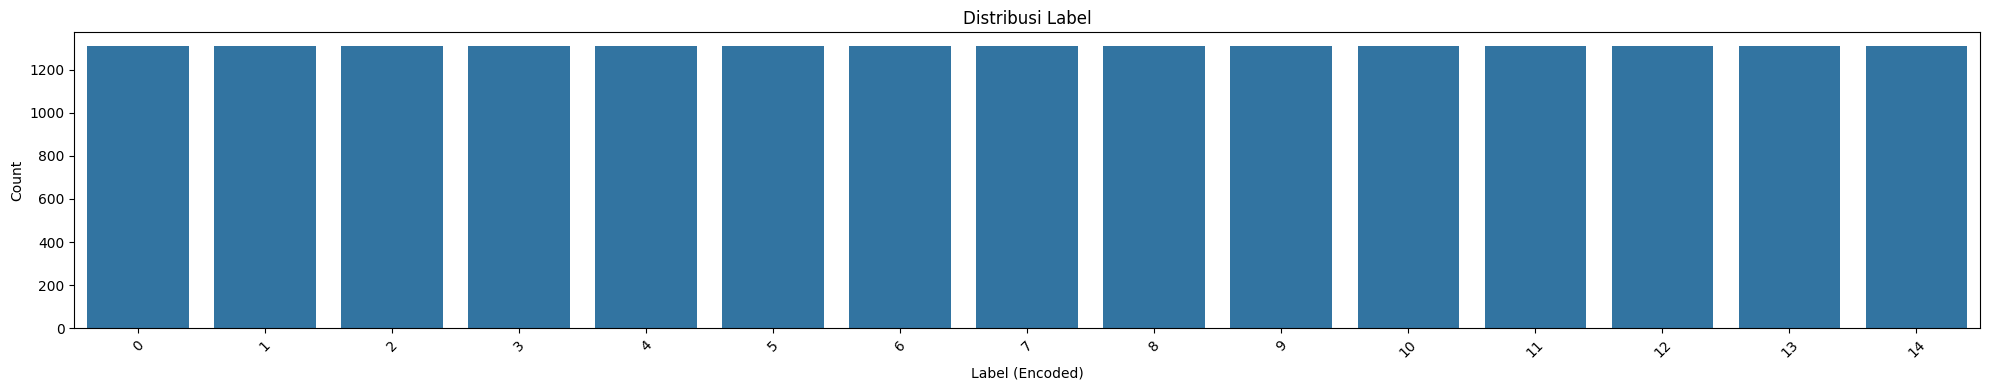

In [ ]:
plt.figure(figsize=(20, 4))
sns.countplot(data=resampled_df, x='Label', order=sorted(df['Label'].unique()))
plt.title('Distribusi Label')
plt.xlabel('Label (Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest Classifier dengan SMOTE (Liza)
model = RandomForestClassifier(n_estimators=100,random_state=50)
model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall    = recall_score(y_test, y_pred_rf, average='weighted')
f1        = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Performance with SMOTE")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_rf, digits=4))

Random Forest Performance with SMOTE
Accuracy : 0.9459
Precision: 0.9461
Recall   : 0.9459
F1-score : 0.9459

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8660    0.8630    0.8645       292
           2     1.0000    0.9968    0.9984       316
           3     1.0000    1.0000    1.0000       325
           4     0.8839    0.9204    0.9017       339
           5     1.0000    1.0000    1.0000       330
           6     0.8746    0.8690    0.8718       313
           7     1.0000    1.0000    1.0000       320
           8     1.0000    1.0000    1.0000       325
           9     0.9106    0.8703    0.8900       316
          10     0.9587    0.9667    0.9627       120
          11     0.9773    0.9773    0.9773        44
          12     0.7778    0.8750    0.8235        16
          13     0.1579    0.2000    0.1765        15
          14     0.0000    0.0000    0.0000        15

    ac

In [ ]:
# Logistic Regression dengan SMOTE (Fina)
model_lr = LogisticRegression()
model_lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = model_lr.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall    = recall_score(y_test, y_pred_lr, average='weighted')
f1        = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistik Regression Performance with SMOTE")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")
print("Detail per kelas:")
print(classification_report(y_test, y_pred_lr, digits=4))

Logistik Regression Performance with SMOTE
Accuracy : 0.3133
Precision: 0.3308
Recall   : 0.3133
F1-score : 0.2783

Detail per kelas:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       313
           1     0.8772    0.1712    0.2865       292
           2     0.0000    0.0000    0.0000       316
           3     0.0000    0.0000    0.0000       325
           4     0.7063    1.0000    0.8278       339
           5     0.0000    0.0000    0.0000       330
           6     0.4220    0.3802    0.4000       313
           7     0.1495    0.5531    0.2354       320
           8     0.7143    0.6923    0.7031       325
           9     0.5606    0.2342    0.3304       316
          10     0.1269    0.3500    0.1863       120
          11     0.5217    0.5455    0.5333        44
          12     0.0000    0.0000    0.0000        16
          13     0.0867    1.0000    0.1596        15
          14     0.0000    0.0000    0.0000        15



In [ ]:
# CatBoost dengan SMOTE (Rafael)
model_cb = CatBoostClassifier(verbose=0, random_state=50)
model_cb.fit(X_train_resampled, y_train_resampled)

y_pred_cb = model_cb.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_cb)
precision = precision_score(y_test, y_pred_cb, average='weighted')
recall    = recall_score(y_test, y_pred_cb, average='weighted')
f1        = f1_score(y_test, y_pred_cb, average='weighted')

print("CatBoost Performance with SMOTE")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")
print("Detail per kelas:")
print(classification_report(y_test, y_pred_cb, digits=4))

In [ ]:
# Gradient Boosting dengan SMOTE (Stefanus)
model_gb = GradientBoostingClassifier(n_estimators=100,random_state=50)
model_gb.fit(X_train_resampled, y_train_resampled)

y_pred_gb = model_gb.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
recall    = recall_score(y_test, y_pred_gb, average='weighted')
f1        = f1_score(y_test, y_pred_gb, average='weighted')

print("Gradient Boosting Performance with SMOTE")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_gb, digits=4))


In [ ]:
# SVM dengan SMOTE (Juang)
from sklearn.svm import SVC

model_svm_smote = SVC(kernel='rbf', random_state=50, class_weight='balanced')
model_svm_smote.fit(X_train_resampled, y_train_resampled)

y_pred_smote = model_svm_smote.predict(X_test)

print("SVM dengan SMOTE")
print(f"Accuracy : {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smote, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_smote, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_smote, average='weighted'):.4f}\n")
print("Detail per kelas:")
print(classification_report(y_test, y_pred_smote, digits=4))

SVM dengan SMOTE
Accuracy : 0.3463
Precision: 0.3479
Recall   : 0.3463
F1-score : 0.2475

Detail per kelas:
              precision    recall  f1-score   support

           0     0.2290    1.0000    0.3726       313
           1     0.0000    0.0000    0.0000       292
           2     0.4068    0.9810    0.5751       316
           3     0.1290    0.0246    0.0413       325
           4     0.4795    1.0000    0.6482       339
           5     0.0000    0.0000    0.0000       330
           6     0.0000    0.0000    0.0000       313
           7     0.6667    0.0688    0.1246       320
           8     0.9885    0.2646    0.4175       325
           9     0.6981    0.2342    0.3507       316
          10     0.0000    0.0000    0.0000       120
          11     0.5106    0.5455    0.5275        44
          12     0.0049    0.0625    0.0090        16
          13     0.0000    0.0000    0.0000        15
          14     0.0000    0.0000    0.0000        15

    accuracy              

In [ ]:
# KNN dengan SMOTE (Reihan)
model_knn_smote = KNeighborsClassifier(n_neighbors=5)
model_knn_smote.fit(X_train_resampled, y_train_resampled)

y_pred_knn = model_knn_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Performance with SMOTE (Tanpa Normalisasi/Skala):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")
print("Detail per kelas:")
print(classification_report(y_test, y_pred_knn, digits=4))


## Standarisasi vs Tanpa Standarisasi

In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_resampled)
X_test_norm = scaler.transform(X_test)

In [ ]:
# Logistic Regression dengan Standarisasi (Fina)
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_norm, y_train_resampled)

y_pred_lr = model_lr.predict(X_test_norm)


accuracy  = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall    = recall_score(y_test, y_pred_lr, average='weighted')
f1        = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistik Regression Performance dengan Standarisasi")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_lr, digits=4))


Logistik Regression Performance dengan Normalisasi
Accuracy : 0.8673
Precision: 0.8890
Recall   : 0.8673
F1-score : 0.8654

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    0.9872    0.9936       313
           1     0.8051    0.6507    0.7197       292
           2     0.9906    0.9968    0.9937       316
           3     0.9939    1.0000    0.9969       325
           4     0.7048    1.0000    0.8268       339
           5     0.8512    0.9879    0.9144       330
           6     0.7697    0.7476    0.7585       313
           7     0.9924    0.8187    0.8973       320
           8     0.9939    1.0000    0.9969       325
           9     0.9943    0.5506    0.7088       316
          10     0.7619    0.6667    0.7111       120
          11     0.3761    0.9318    0.5359        44
          12     0.4483    0.8125    0.5778        16
          13     0.4688    1.0000    0.6383        15
          14     0.0000    0.0000    0.0000    

In [ ]:
# SVM dengan Standarisasi dan SMOTE (Juang)
from sklearn.svm import SVC

model_svm = SVC(random_state=50)
model_svm.fit(X_train_norm, y_train_resampled)

y_pred_svm = model_svm.predict(X_test_norm)

accuracy  = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall    = recall_score(y_test, y_pred_svm, average='weighted')
f1        = f1_score(y_test, y_pred_svm, average='weighted')

print("SVM Performance with SMOTE and Standardization")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_svm, digits=4))

SVM Performance with SMOTE
Accuracy : 0.8706
Precision: 0.8892
Recall   : 0.8706
F1-score : 0.8707

Detail per kelas:
              precision    recall  f1-score   support

           0     0.9904    0.9872    0.9888       313
           1     0.8085    0.6507    0.7211       292
           2     0.9937    0.9937    0.9937       316
           3     0.9878    1.0000    0.9939       325
           4     0.7604    0.9735    0.8538       339
           5     0.8069    0.9879    0.8883       330
           6     0.7843    0.7668    0.7754       313
           7     0.9837    0.7562    0.8551       320
           8     0.9969    0.9969    0.9969       325
           9     0.9550    0.6709    0.7881       316
          10     0.8421    0.6667    0.7442       120
          11     0.3500    0.9545    0.5122        44
          12     0.5217    0.7500    0.6154        16
          13     0.0000    0.0000    0.0000        15
          14     0.4333    0.8667    0.5778        15

    accuracy    

In [ ]:
## KNN + Standarisasi + SMOTE
model_knn_norm_smote = KNeighborsClassifier(n_neighbors=5)
model_knn_norm_smote.fit(X_train_norm, y_train_resampled)

y_pred_knn = model_knn_norm_smote.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Performance with SMOTE and Standardization:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")
print("Detail per kelas:")
print(classification_report(y_test, y_pred_knn, digits=4))


## **SKENARIO 2 (IMBALANCE + STANDARISASI)**

In [ ]:
scaler = StandardScaler()
X_train_norm2 = scaler.fit_transform(X_train)
X_test_norm2 = scaler.transform(X_test)

In [ ]:
# Catboost dengan Standarisasi Imbalance (Rafael)

model_cb = CatBoostClassifier(random_state=50,verbose=0)
model_cb.fit(X_train_norm2, y_train)

y_pred_cb = model_cb.predict(X_test_norm2)

accuracy  = accuracy_score(y_test, y_pred_cb)
precision = precision_score(y_test, y_pred_cb, average='weighted')
recall    = recall_score(y_test, y_pred_cb, average='weighted')
f1        = f1_score(y_test, y_pred_cb, average='weighted')

print("CatBoost Performance with Standarisasi")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_cb, digits=4))

In [ ]:
# Random Forest Classifier dengan Standarisasi Imbalance (Liza)
model = RandomForestClassifier(n_estimators=100,random_state=50)
model.fit(X_train_norm2, y_train)

y_pred_rf = model.predict(X_test_norm2)

accuracy  = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall    = recall_score(y_test, y_pred_rf, average='weighted')
f1        = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Performance with Standarisasi")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_rf, digits=4))

Random Forest Performance with Normalisasi
Accuracy : 0.9382
Precision: 0.9381
Recall   : 0.9382
F1-score : 0.9381

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8681    0.8562    0.8621       292
           2     0.9968    0.9968    0.9968       316
           3     1.0000    1.0000    1.0000       325
           4     0.8609    0.8584    0.8597       339
           5     0.9970    1.0000    0.9985       330
           6     0.8639    0.8722    0.8680       313
           7     1.0000    1.0000    1.0000       320
           8     1.0000    1.0000    1.0000       325
           9     0.8486    0.8513    0.8499       316
          10     0.9669    0.9750    0.9710       120
          11     0.9767    0.9545    0.9655        44
          12     0.8750    0.8750    0.8750        16
          13     0.2222    0.2667    0.2424        15
          14     0.0833    0.0667    0.0741        15



In [ ]:
# Gradient Boosting dengan Standarisasi Imbalance (Stefanus)
model_gb = GradientBoostingClassifier(n_estimators=100,random_state=50)
model_gb.fit(X_train_norm2, y_train)

y_pred_gb = model_gb.predict(X_test_norm2)

accuracy  = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
recall    = recall_score(y_test, y_pred_gb, average='weighted')
f1        = f1_score(y_test, y_pred_gb, average='weighted')

print("Gradient Boosting Performance with Standardization")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Detail per kelas:")
print(classification_report(y_test, y_pred_gb, digits=4))


# **SKENARIO 3 (SELECTION FITUR + STANDARISASI + SMOTE)**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=70)
X_train_selected = selector.fit_transform(X_train_norm, y_train_resampled)
X_test_selected = selector.transform(X_test_norm)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Fitur yang dipilih:", selected_features)
print(len(selected_features))

Fitur yang dipilih: Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size

In [ ]:
# Logistik Regression
k_param = [10,20,30,40,50,60,70,80]

for ks in k_param:
  selector = SelectKBest(score_func=f_classif, k=ks)
  X_train_selected = selector.fit_transform(X_train_norm, y_train_resampled)
  X_test_selected = selector.transform(X_test_norm)

  model_lr = LogisticRegression()
  model_lr.fit(X_train_selected, y_train_resampled)

  y_pred_lr = model_lr.predict(X_test_selected)

  accuracy  = accuracy_score(y_test, y_pred_lr)
  precision = precision_score(y_test, y_pred_lr, average='weighted')
  recall    = recall_score(y_test, y_pred_lr, average='weighted')
  f1        = f1_score(y_test, y_pred_lr, average='weighted')

  print("Logistik Regression Performance dengan Normalisasi with k=",ks)
  print(f"Accuracy : {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall   : {recall:.4f}")
  print(f"F1-score : {f1:.4f}\n")

  print("Detail per kelas:")
  print(classification_report(y_test, y_pred_lr, digits=4))



Logistik Regression Performance dengan Normalisasi with k= 10
Accuracy : 0.6072
Precision: 0.5858
Recall   : 0.6072
F1-score : 0.5682

Detail per kelas:
              precision    recall  f1-score   support

           0     0.6306    0.9872    0.7696       313
           1     0.2258    0.0479    0.0791       292
           2     0.5720    0.9810    0.7226       316
           3     0.9531    1.0000    0.9760       325
           4     0.7244    1.0000    0.8401       339
           5     0.5336    0.3848    0.4472       330
           6     0.5436    0.4185    0.4729       313
           7     0.9565    0.6875    0.8000       320
           8     0.9655    0.6892    0.8043       325
           9     0.0000    0.0000    0.0000       316
          10     0.1458    0.0583    0.0833       120
          11     0.1438    0.9773    0.2507        44
          12     0.0000    0.0000    0.0000        16
          13     0.1154    1.0000    0.2069        15
          14     0.0000    0.0000   

In [ ]:
##SVM
from sklearn.svm import SVC

k_param = [10, 20, 30, 40, 50, 60, 70, 80]

for ks in k_param:
    selector = SelectKBest(score_func=f_classif, k=ks)
    X_train_selected = selector.fit_transform(X_train_norm, y_train_resampled)
    X_test_selected = selector.transform(X_test_norm)

    model = SVC(kernel='rbf', random_state=50)
    model.fit(X_train_selected, y_train_resampled)

    y_pred = model.predict(X_test_selected)

    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall    = recall_score(y_test, y_pred, average='weighted')
    f1        = f1_score(y_test, y_pred, average='weighted')

    print(f"SVM Performance with Normalisasi and k = {ks}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}\n")

    print("Detail per kelas:")
    print(classification_report(y_test, y_pred, digits=4))

# ***Confusion Matrix For Best Logistic Regression***

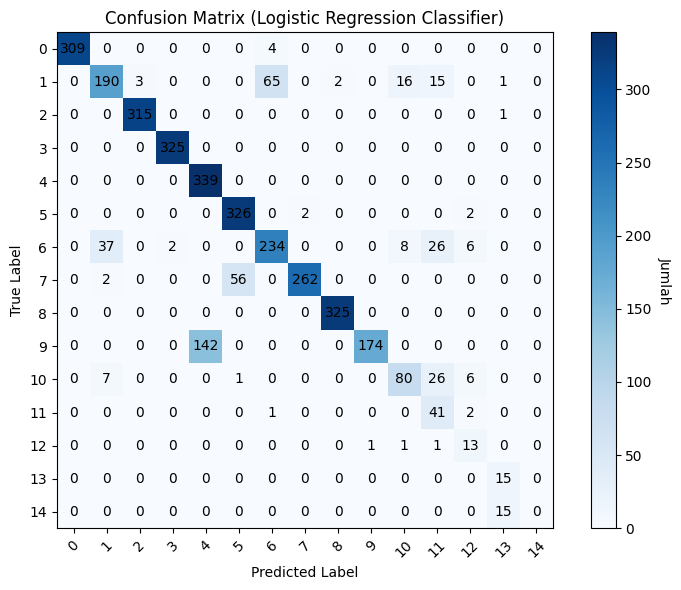

In [ ]:
## Confusion Matrix for Best Logistic Regression (fina)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
classes = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Jumlah', rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45)
ax.set_yticks(np.arange(len(classes)))
ax.set_yticklabels(classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix (Logistic Regression Classifier)')

fig.tight_layout()
plt.show()

In [ ]:
## KNN dengan Feature Selection
k_param = [10,20,30,40,50,60,70,80]

for ks in k_param:
    selector = SelectKBest(score_func=f_classif, k=ks)
    X_train_selected = selector.fit_transform(X_train_norm, y_train_resampled)
    X_test_selected = selector.transform(X_test_norm)

    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train_selected, y_train_resampled)

    y_pred_knn = model_knn.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn, average='weighted')
    recall = recall_score(y_test, y_pred_knn, average='weighted')
    f1 = f1_score(y_test, y_pred_knn, average='weighted')

    print(f"KNN Performance with Normalization and Feature Selection k = {ks}:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}\n")

    print("Detail per kelas:")
    print(classification_report(y_test, y_pred_knn, digits=4))

In [ ]:
##SVM
from sklearn.svm import SVC

k_param = [10, 20, 30, 40, 50, 60, 70, 80]

for ks in k_param:
    selector = SelectKBest(score_func=f_classif, k=ks)
    X_train_selected = selector.fit_transform(X_train_norm, y_train_resampled)
    X_test_selected = selector.transform(X_test_norm)

    model = SVC(kernel='rbf', random_state=50)
    model.fit(X_train_selected, y_train_resampled)

    y_pred = model.predict(X_test_selected)

    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall    = recall_score(y_test, y_pred, average='weighted')
    f1        = f1_score(y_test, y_pred, average='weighted')

    print(f"SVM Performance with Normalisasi and k = {ks}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}\n")

    print("Detail per kelas:")
    print(classification_report(y_test, y_pred, digits=4))

SVM Performance with Normalisasi and k = 10
Accuracy : 0.6117
Precision: 0.6704
Recall   : 0.6117
F1-score : 0.5880

Detail per kelas:
              precision    recall  f1-score   support

           0     0.5309    0.9872    0.6905       313
           1     0.5455    0.0822    0.1429       292
           2     0.5699    0.9810    0.7209       316
           3     0.9531    1.0000    0.9760       325
           4     0.7847    0.9351    0.8533       339
           5     0.5226    0.3848    0.4433       330
           6     0.5233    0.4313    0.4729       313
           7     0.9821    0.6844    0.8066       320
           8     0.9956    0.6892    0.8145       325
           9     0.6667    0.1329    0.2216       316
          10     0.0000    0.0000    0.0000       120
          11     0.0854    0.5455    0.1477        44
          12     0.1231    0.5000    0.1975        16
          13     0.0000    0.0000    0.0000        15
          14     0.4688    1.0000    0.6383        15


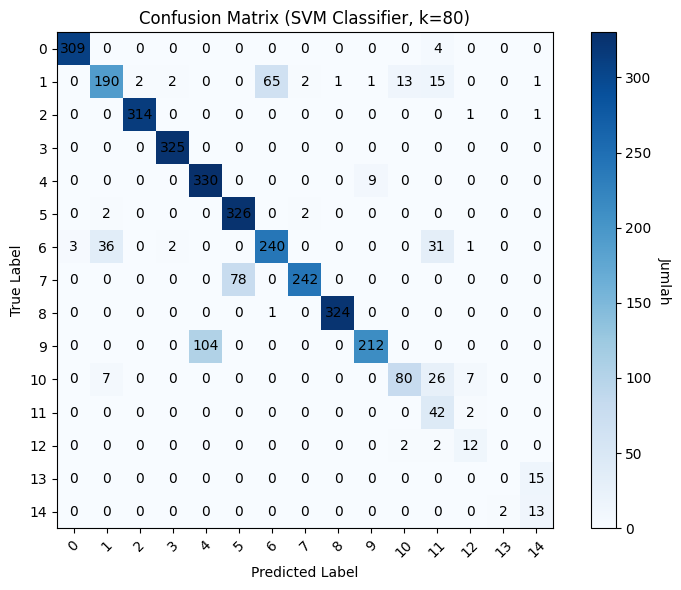

In [ ]:
## Confusion Matrix for SVM (Juang)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Jumlah', rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45)
ax.set_yticks(np.arange(len(classes)))
ax.set_yticklabels(classes)

for i in range(len(classes)):
  for j in range(len(classes)):
    ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title(f'Confusion Matrix (SVM Classifier, k={ks})')

fig.tight_layout()
plt.show()

# **SKENARIO 3 (SELECTION FITUR + TANPA STANDARISASI + IMBALANCE)**





In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=70)
X_train_selected = selector.fit_transform(X_train_norm, y_train_resampled)
X_test_selected = selector.transform(X_test_norm)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Fitur yang dipilih:", selected_features)
print(len(selected_features))

NameError: name 'X_train_norm' is not defined

In [ ]:
# Random Forest (Liza)
k_param = [10,20,30,40,50,60,70,80]

for ks in k_param:
  selector = SelectKBest(score_func=f_classif, k=ks)
  X_train_selected3 = selector.fit_transform(X_train, y_train)
  X_test_selected3 = selector.transform(X_test)

  model_rf = RandomForestClassifier(n_estimators=100,random_state=50)
  model_rf.fit(X_train, y_train)

  y_pred_lr = model_rf.predict(X_test)

  accuracy  = accuracy_score(y_test, y_pred_rf)
  precision = precision_score(y_test, y_pred_rf, average='weighted')
  recall    = recall_score(y_test, y_pred_rf, average='weighted')
  f1        = f1_score(y_test, y_pred_rf, average='weighted')

  print("Random Forest Performance with Standardization and Selection Features with k =", ks)
  print(f"Accuracy : {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall   : {recall:.4f}")
  print(f"F1-score : {f1:.4f}\n")

  print("Detail per kelas:")
  print(classification_report(y_test, y_pred_rf, digits=4))




Random Forest Performance dengan Tanpa Normalisasi with k= 10
Accuracy : 0.9382
Precision: 0.9381
Recall   : 0.9382
F1-score : 0.9381

Detail per kelas:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       313
           1     0.8681    0.8562    0.8621       292
           2     0.9968    0.9968    0.9968       316
           3     1.0000    1.0000    1.0000       325
           4     0.8609    0.8584    0.8597       339
           5     0.9970    1.0000    0.9985       330
           6     0.8639    0.8722    0.8680       313
           7     1.0000    1.0000    1.0000       320
           8     1.0000    1.0000    1.0000       325
           9     0.8486    0.8513    0.8499       316
          10     0.9669    0.9750    0.9710       120
          11     0.9767    0.9545    0.9655        44
          12     0.8750    0.8750    0.8750        16
          13     0.2222    0.2667    0.2424        15
          14     0.0833    0.0667   

In [ ]:
# CatBoost (Rafael)
# CatBoost
k_param = [10,20,30,40,50,60,70,80]

for ks in k_param:
  selector = SelectKBest(score_func=f_classif, k=ks)
  X_train_selected3 = selector.fit_transform(X_train, y_train)
  X_test_selected3 = selector.transform(X_test)

  model_catboost = CatBoostClassifier(iterations=100, random_state=50, verbose=False)
  model_catboost.fit(X_train, y_train)

  y_pred_catboost = model_catboost.predict(X_test)

  accuracy  = accuracy_score(y_test, y_pred_catboost)
  precision = precision_score(y_test, y_pred_catboost, average='weighted')
  recall    = recall_score(y_test, y_pred_catboost, average='weighted')
  f1        = f1_score(y_test, y_pred_catboost, average='weighted')

  print("CatBoost Performance with Standardization and Selection Features with k =", ks)
  print(f"Accuracy : {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall   : {recall:.4f}")
  print(f"F1-score : {f1:.4f}\n")

  print("Detail per kelas:")
  print(classification_report(y_test, y_pred_catboost, digits=4))

In [ ]:
# Gradient Boosting (Stefanus)
k_param = [10,20,30,40,50,60,70,80]

for ks in k_param:
  selector = SelectKBest(score_func=f_classif, k=ks)
  X_train_selected3 = selector.fit_transform(X_train, y_train)
  X_test_selected3 = selector.transform(X_test)

  model_gb = GradientBoostingClassifier(n_estimators=100,random_state=50)
  model_gb.fit(X_train_selected3, y_train)

  y_pred_gb = model_gb.predict(X_test_selected3)

  accuracy  = accuracy_score(y_test, y_pred_gb)
  precision = precision_score(y_test, y_pred_gb, average='weighted')
  recall    = recall_score(y_test, y_pred_gb, average='weighted')
  f1        = f1_score(y_test, y_pred_gb, average='weighted')

  print("Gradient Boosting Performance with Standardization and Selection Features with k =", ks)
  print(f"Accuracy : {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall   : {recall:.4f}")
  print(f"F1-score : {f1:.4f}\n")

  print("Detail per kelas:")
  print(classification_report(y_test, y_pred_gb, digits=4))


NameError: name 'SelectKBest' is not defined